<a href="https://colab.research.google.com/github/mikewig/EDA-Group/blob/feature%2Fpreprocessing/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis en el ambito de la ciberseguridad
## Cybersecurity 🪪 Intrusion 🦠 Detection Dataset
Este conjunto de datos de detección de intrusiones de ciberseguridad está diseñado para detectar ciberintrusiones basándose en el tráfico de red y el comportamiento del usuario. A continuación, explicaré cada aspecto en detalle, incluyendo la estructura del conjunto de datos, la importancia de las características, los posibles enfoques de análisis y cómo se puede utilizar para el aprendizaje automático.

[Data set](https://www.kaggle.com/datasets/dnkumars/cybersecurity-intrusion-detection-dataset/data)

Proyecto inicial análisis EDA  Michael López
Colaboradores:


* Polina Pavlova
* Stephany Lizarraga  
* Andrea Alonso
* Juan Carlos Macías

Abril del 2025



In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [5]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (6, 4)
%matplotlib inline

In [6]:
df = pd.read_csv("cybersecurity.csv")
df.head()

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   session_id           9537 non-null   object 
 1   network_packet_size  9537 non-null   int64  
 2   protocol_type        9537 non-null   object 
 3   login_attempts       9537 non-null   int64  
 4   session_duration     9537 non-null   float64
 5   encryption_used      7571 non-null   object 
 6   ip_reputation_score  9537 non-null   float64
 7   failed_logins        9537 non-null   int64  
 8   browser_type         9537 non-null   object 
 9   unusual_time_access  9537 non-null   int64  
 10  attack_detected      9537 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 819.7+ KB


In [8]:
df.describe()

,network_packet_size,login_attempts,session_duration,ip_reputation_score,failed_logins,unusual_time_access,attack_detected
count,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000
mean,500.430639,4.032086,792.745312,0.331338,1.517773,0.149942,0.447101
std,198.379364,1.963012,786.560144,0.177175,1.033988,0.357034,0.497220
min,64.000000,1.000000,0.500000,0.002497,0.000000,0.000000,0.000000
25%,365.000000,3.000000,231.953006,0.191946,1.000000,0.000000,0.000000
50%,499.000000,4.000000,556.277457,0.314778,1.000000,0.000000,0.000000
75%,635.000000,5.000000,1105.380602,0.453388,2.000000,0.000000,1.000000
max,1285.000000,13.000000,7190.392213,0.924299,5.000000,1.000000,1.000000


In [9]:
print(df.isnull().sum())

session_id                0
network_packet_size       0
protocol_type             0
login_attempts            0
session_duration          0
encryption_used        1966
ip_reputation_score       0
failed_logins             0
browser_type              0
unusual_time_access       0
attack_detected           0
dtype: int64


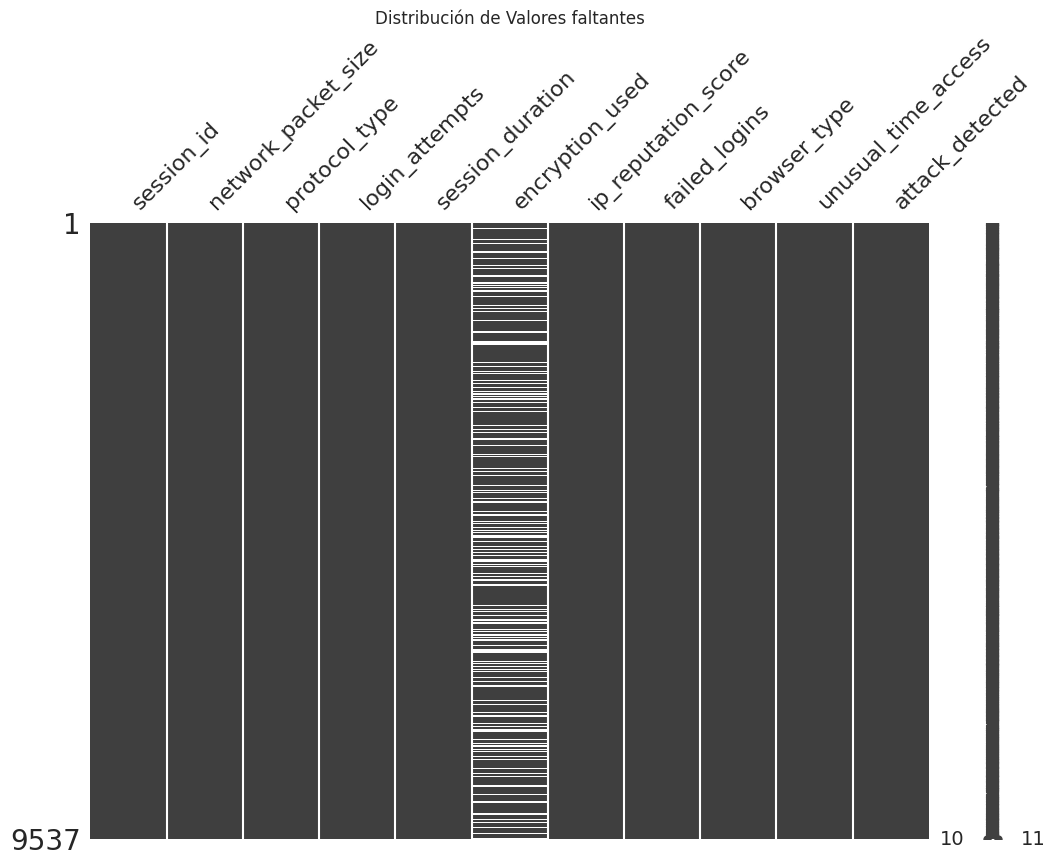

In [10]:
msno.matrix(df, figsize=(12, 8))
plt.title('Distribución de Valores faltantes')
plt.show()

In [11]:
missing_percent = df.isnull().sum() / len(df) * 100
missing_percent

,0
session_id,0.000000
network_packet_size,0.000000
protocol_type,0.000000
login_attempts,0.000000
session_duration,0.000000
encryption_used,20.614449
ip_reputation_score,0.000000
failed_logins,0.000000
browser_type,0.000000
unusual_time_access,0.000000


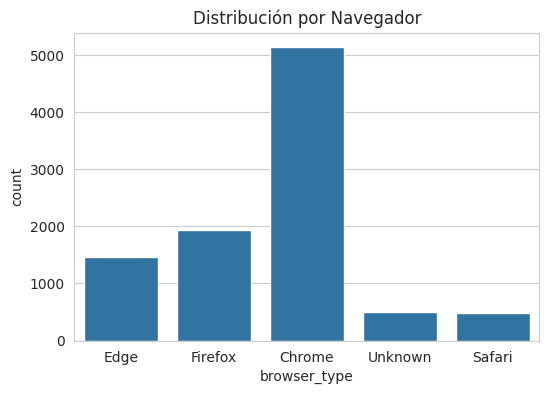

In [12]:
sns.countplot(x="browser_type", data=df)
plt.title("Distribución por Navegador")
plt.show()

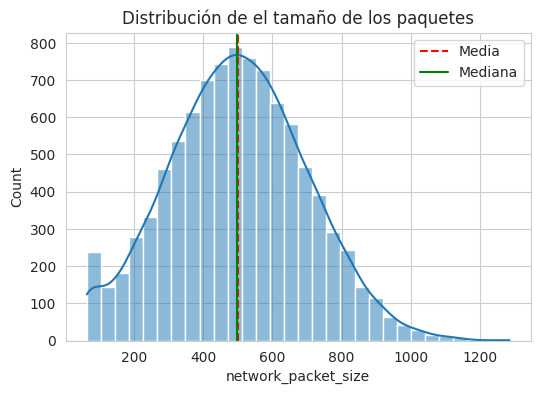

In [13]:
sns.histplot(df["network_packet_size"], kde=True, bins=30)
plt.title("Distribución de el tamaño de los paquetes")
plt.axvline(df["network_packet_size"].mean(), color='r', linestyle='--', label='Media')
plt.axvline(df["network_packet_size"].median(), color='g', linestyle='-', label='Mediana')
plt.legend()
plt.show()

<ipython-input-14-6f111d6b315b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="attack_detected",data=df,palette="Blues")


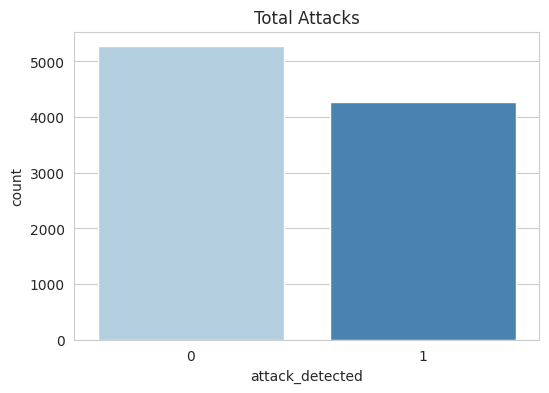

In [14]:
sns.countplot(x="attack_detected",data=df,palette="Blues")
plt.title("Total Attacks")
plt.show()

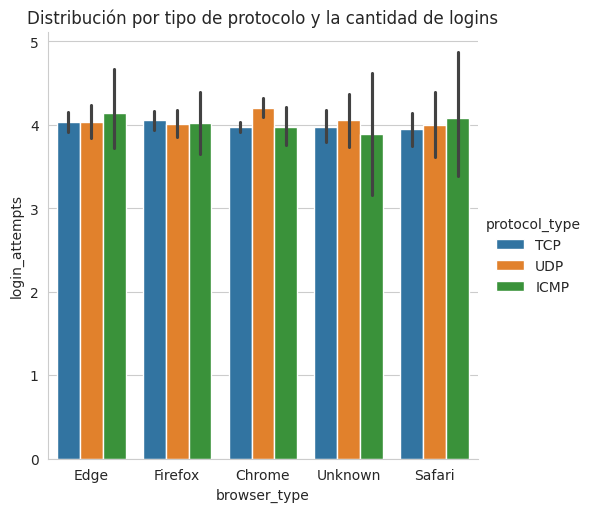

In [15]:
sns.catplot(x="browser_type", y="login_attempts", hue="protocol_type", kind="bar", data=df)
plt.title("Distribución por tipo de protocolo y la cantidad de logins")
plt.show()

In [16]:
from scipy import stats
# Lista de navegadores
navegadores = ["Edge", "Firefox", "Chrome", "Unknown", "Safari"]
df = df[df['browser_type'].isin(navegadores)]
# Separar datos por navegador
relevant_column = 'login_attempts'
edge = df[df['browser_type'] == "Edge"][relevant_column]
firefox = df[df['browser_type'] == "Firefox"][relevant_column]
chrome = df[df['browser_type'] == "Chrome"][relevant_column]
unknown = df[df['browser_type'] == "Unknown"][relevant_column]
safari = df[df['browser_type'] == "Safari"][relevant_column]


# analizar ANOVA test
# https://www.datacamp.com/es/tutorial/anova-test
f_statistic, p_value = stats.f_oneway(edge, firefox, chrome, unknown, safari)

# Mostrar los resultados
print("ANOVA Test - Comparación entre navegadores")
print(f"F-Statistic: {f_statistic:.2f}")
print(f"P-Value: {p_value:.3f}")

# Interpretación 5%, basado en los resultados significativos de un porcentaje de 0.05 (5%)
if p_value < 0.05:
    print("Existe una diferencia estadísticamente significativa entre al menos dos navegadores.")
else:
    print("No hay diferencias significativas entre los navegadores.")

ANOVA Test - Comparación entre navegadores
F-Statistic: 0.18
P-Value: 0.951
No hay diferencias significativas entre los navegadores.


In [17]:
valores_unicos_columna = df['encryption_used'].unique()
valores_unicos_columna

array(['DES', 'AES', nan], dtype=object)

In [24]:
df2 = df.copy()

In [25]:
df2['encryption_used'] = df2['encryption_used'].fillna('None') #tras leer la documentación. el nan significa no encriptado, no es dato perdido

In [26]:
df2 = df2.drop(columns=['session_id']) # no es útil para la analítica, solo identifica la sessión

### Codificar variables categoricas

In [28]:
df2 = pd.get_dummies(df2, columns=['protocol_type', 'encryption_used', 'browser_type'], drop_first=True) #get_dummies usa OneHot Encoding! drop_first elimina la primera columna, la original, prque ya está representada por otras True/False

In [29]:
df2.sample()

,network_packet_size,login_attempts,session_duration,ip_reputation_score,failed_logins,unusual_time_access,attack_detected,protocol_type_TCP,protocol_type_UDP,encryption_used_DES,encryption_used_None,browser_type_Edge,browser_type_Firefox,browser_type_Safari,browser_type_Unknown
4631,392,6,59.617874,0.115911,1,0,1,True,False,True,False,False,True,False,False


### Escalar las variables numericas

In [ ]:
from sklearn.preprocessing import StandardScaler # transforma los datos para que tengan una media de 0 y una desviación estándar de 1, lo que ayuda a que las características (o variables) estén en la misma escala
scaler = StandardScaler()
numerical_columns = ['network_packet_size', 'login_attempts', 'session_duration', 'ip_reputation_score', 'failed_logins']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])